In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [ ]:
df.shape()

In [ ]:
df.shape


(100, 4)

In [ ]:
df = df.iloc[:,1:]

In [ ]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [ ]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [ ]:
import matplotlib.pyplot as plt


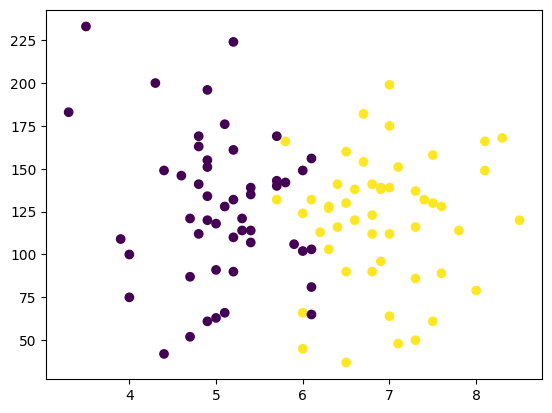

In [ ]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [ ]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [ ]:
y.head()

0    1
1    0
2    0
3    1
4    0
Name: placement, dtype: int64

In [ ]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size =0.1 )

In [ ]:
x_train

,cgpa,iq
52,7.0,175.0
60,6.9,139.0
23,4.7,87.0
46,5.3,114.0
68,4.0,75.0
...,...,...
83,7.5,130.0
40,4.9,134.0
50,3.5,233.0
73,4.9,61.0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
x_train = scaler.fit_transform(x_train)

In [ ]:
x_train

array([[ 9.10870596e-01,  1.33487172e+00],
       [ 8.21080505e-01,  4.10334659e-01],
       [-1.15430151e+00, -9.25107764e-01],
       [-6.15560962e-01, -2.31704967e-01],
       [-1.78283215e+00, -1.23328678e+00],
       [-2.56400595e-01,  4.36016244e-01],
       [ 1.44961115e+00,  1.27837223e-01],
       [-2.56400595e-01,  1.18078221e+00],
       [ 1.18024087e+00, -1.87532641e+00],
       [-8.84931237e-01, -1.28978627e-01],
       [-1.15430151e+00, -1.82396324e+00],
       [-1.66610503e-01,  4.87379414e-01],
       [ 1.35982105e+00,  8.98284775e-01],
       [-2.41136279e+00,  1.54032440e+00],
       [-7.95141145e-01,  1.36055331e+00],
       [-7.05351053e-01, -3.34431308e-01],
       [ 1.18024087e+00, -1.80341797e-01],
       [ 6.41500321e-01,  1.51464282e+00],
       [-2.56400595e-01,  5.13060999e-01],
       [-1.78283215e+00, -5.91247158e-01],
       [ 1.02759772e-01, -5.14202403e-01],
       [ 1.02759772e-01,  2.30563564e-01],
       [ 1.02759772e-01, -1.07919727e+00],
       [-6.

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
x_test

array([[ 0.28233995,  0.10215564],
       [-0.1666105 ,  1.10373746],
       [-0.70535105,  2.59326939],
       [ 2.07814179,  1.15510063],
       [-1.06451142, -0.28306814],
       [-0.88493124, -1.5414658 ],
       [ 0.01296968, -1.46442105],
       [-1.87262224, -0.36011289],
       [ 1.18024087,  0.35897149],
       [ 1.62919133, -0.23170497]])

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
clf = LogisticRegression()

In [ ]:

# model training
clf.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_test

70    1
85    1
16    0
53    1
59    0
7     0
45    1
31    0
61    1
55    1
Name: placement, dtype: int64

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test , y_pred)

0.8

In [ ]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

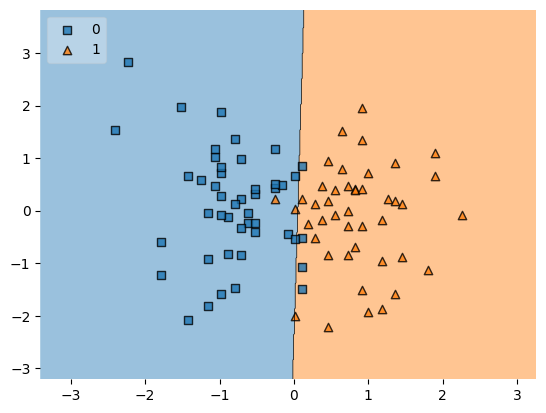

In [ ]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [ ]:
import pickle

In [ ]:
pickle.dump(clf , open('model.pkl' , 'wb'))